In [1]:
import bs4
import requests
import sys
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import time
import random as ran
from scipy import stats
import numpy as np
from scipy.stats import t
from numpy.polynomial.polynomial import polyfit

In [2]:
df_merged_c = pd.read_csv('final_merged_movies.csv')
df_merged_c.head(3)

,Movie_Name,Rating_Score,Movie_Genre,Cast,Gross_USA,keywords,overview,Total_Votes
0,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi","J.J. Abrams, Daisy Ridley, John Boyega, Oscar...",936662225.0,"android,spacecraft,space opera",Thirty years after defeating the Galactic Empi...,937561.0
1,Avengers: Endgame,8.4,"Action, Adventure, Drama","Anthony Russo, Joe Russo, Robert Downey Jr., ...",858373000.0,"space travel,time travel,time machine,sequel,s...",After the devastating events of Avengers: Infi...,1147483.0
2,Spider-Man: No Way Home,8.2,"Action, Adventure, Fantasy","Jon Watts, Tom Holland, Zendaya, Benedict Cum...",804747988.0,"new york city,loss of loved one,showdown,secre...",Peter Parker is unmasked and no longer able to...,770024.0


### Data Cleaning


In [3]:
df_merged_c.dropna(inplace = True)
df_merged_c['Gross_USA'] = df_merged_c['Gross_USA'].astype('int64')
df_merged_c['Total_Votes'] = df_merged_c['Total_Votes'].astype('int64')

### Analysis-1 Trend Analysis on Gross Revenue of Movies Trended from 2014 to 2021


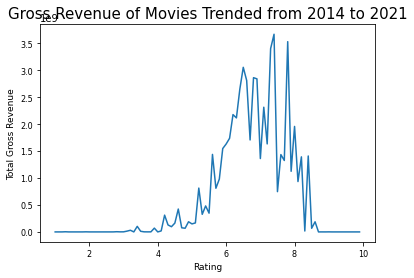

In [4]:
df_analysis1 = df_merged_c.groupby('Rating_Score').agg({'Gross_USA':['sum']}).reset_index()
df_analysis1.columns = ['Rating_Score', 'Gross_Sum']
df_analysis1_1 = df_analysis1.sort_values(["Rating_Score"], ascending = False)

plt.figure(figsize = (6,4))
p = sns.lineplot(data = df_analysis1_1, x = 'Rating_Score', y = 'Gross_Sum')
p.tick_params(labelsize = 8)
plt.title('Gross Revenue of Movies Trended from 2014 to 2021', fontsize = 15)
plt.xlabel('Rating', fontsize = 9)
plt.ylabel('Total Gross Revenue', fontsize = 9)
plt.savefig("1Gross-Year.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analysis 2 Exploring the Relationship Between IMDb Votes and Box Office Revenue

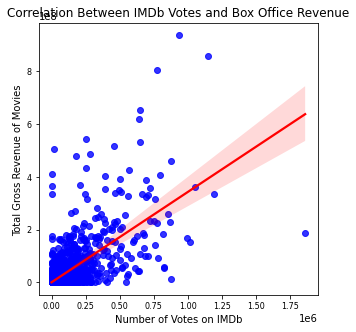

In [5]:
plt.figure(figsize=(5,5))
sns.regplot(data=df_merged_c.sample(frac=1), x='Total_Votes', y='Gross_USA', color = 'blue', line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})

plt.tick_params(labelsize = 8)
plt.title('Correlation Between IMDb Votes and Box Office Revenue', fontsize = 12)
plt.xlabel('Number of Votes on IMDb', fontsize = 10)
plt.ylabel('Total Gross Revenue of Movies ', fontsize = 10)
plt.savefig("2Votes-Gross.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Pearson Test 

In [6]:
(r,p) = stats.pearsonr(df_merged_c.Total_Votes, df_merged_c.Gross_USA)
print('r =', r, 'p =', p)

r = 0.7088166565979966 p = 0.0


### Analysis 3 Proportion of Movies by Genre: A Pie Chart

In [7]:
expanded_list=[]
for row in df_merged_c.itertuples():
    genres=row.Movie_Genre.split(',')
    for genre in genres:
        expanded_list.append([row.Movie_Name, row.Rating_Score, row.Total_Votes, row.Gross_USA,genre.strip()])    

df_genres_expanded = pd.DataFrame(expanded_list, columns = ['Movie_Name', 'Rating_Score', 'Total_Votes', 'Gross_USA', 'Movie_Genre'])
df_genres_expanded.Movie_Genre.unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Animation',
       'Family', 'Comedy', 'Crime', 'Thriller', 'Biography', 'Horror',
       'History', 'Music', 'Mystery', 'Musical', 'Romance', 'War',
       'Sport', 'Western', 'Reality-TV'], dtype=object)

In [8]:
grp_mov_collection = df_genres_expanded.groupby(['Movie_Genre']).agg({'Gross_USA': 'mean','Total_Votes':'mean','Rating_Score':'mean'}).reset_index()

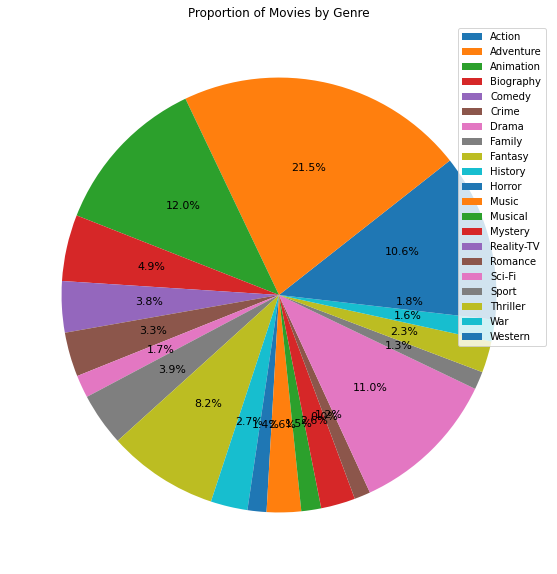

In [9]:
plt.subplots(figsize=(10, 10))
labels=grp_mov_collection['Movie_Genre'].unique()
plt.pie(data=grp_mov_collection, x='Gross_USA', autopct='%1.1f%%', textprops={'fontsize': 11},shadow=False)
plt.title('Proportion of Movies by Genre')
plt.legend(labels=labels)
plt.savefig("3genre-pie.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analysis 4 Comparing Director and Movie Ratings

In [10]:
expanded_list1=[]
for row in df_merged_c.itertuples():
    directors=row.Cast.split(',')
    for director in directors:
        expanded_list1.append([row.Movie_Name, row.Rating_Score, row.Movie_Genre, row.Total_Votes, row.Gross_USA, director.strip()])  
df_dir_expanded = pd.DataFrame(expanded_list1, columns = ['Movie_Name', 'Rating_Score', 'Movie_Genre','Total_Votes', 'Gross_USA','Cast'])
display(df_dir_expanded)
df_5 = df_dir_expanded
df_5_g = df_5.groupby(['Cast', 'Movie_Name']).agg({'Rating_Score':['mean']}).reset_index()
df_5_g.columns = ['Cast','Movie_Name', 'Rating_Score' ]
df_5_g = df_5_g.dropna().sort_values('Rating_Score', ascending = False).replace('nan', '')

,Movie_Name,Rating_Score,Movie_Genre,Total_Votes,Gross_USA,Cast
0,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi",937561,936662225,J.J. Abrams
1,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi",937561,936662225,Daisy Ridley
2,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi",937561,936662225,John Boyega
3,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi",937561,936662225,Oscar Isaac
4,Star Wars: Episode VII - The Force Awakens,7.8,"Action, Adventure, Sci-Fi",937561,936662225,Domhnall Gleeson
...,...,...,...,...,...,...
95092,Weather Report,9.5,Drama,8,8,Ravi Davala
95093,Weather Report,9.5,Drama,8,8,Arjun Radhakrishnan
95094,Weather Report,9.5,Drama,8,8,Nrupa Soman
95095,Weather Report,9.5,Drama,8,8,Amol Deshmukh


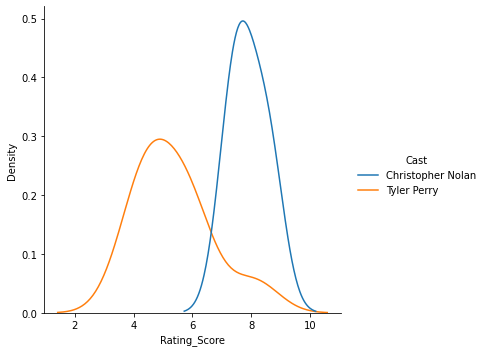

In [11]:
sns.displot(data=df_5_g[df_5_g.Cast.isin(['Tyler Perry', 'Christopher Nolan'])],
            x='Rating_Score', hue='Cast', kind='kde',common_norm=False)
plt.show()